In [25]:
# this section is to drop unwanted columns and rows with NaN values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# convert_shot 是惠晴給我的
original_shots = pd.read_csv('convert_shot.csv')
original_rally = pd.read_csv('rally_0108.csv')
print("Original shots data columns: ")
print(original_shots.columns)
print("---------------------------------")

# nan_count = original_shots.isna().sum()
# print("Number of NaN values in each column: ")
# print(nan_count)
# print("---------------------------------")

print("drop nan values")
columns_to_check = ["player_location_x", "player_location_y", "opponent_location_x", "opponent_location_y", "shot_id", 
                    "rally_id", "shot_player", "shot_number"]
drop_nan_shots = original_shots.dropna(subset=columns_to_check)
# print("Number of NaN values in each column after dropping NaN values: ")
# print(drop_nan_shots.isna().sum())
print("data after dropping NaN values: drop_nan_shots")
print("---------------------------------")

print("drop nan values in rally data")
drop_nan_rally = original_rally.dropna(subset=["rally_id", "set_id"])
print("data after dropping NaN values: drop_nan_rally")
print("---------------------------------")

print("drop columns unrelated")
columns_to_drop = original_shots.columns.difference(columns_to_check)
# print("columns to drop: ")
# print(columns_to_drop)
drop_nan_and_unrelated_shots = drop_nan_shots.drop(columns=columns_to_drop)
print("length of data after dropping unrelated columns: ", len(drop_nan_and_unrelated_shots))
print("---------------------------------")

print("drop columns unrelated in rally data")
columns_to_check_rally = ["rally_id", "set_id"]
columns_to_drop_rally = drop_nan_rally.columns.difference(columns_to_check_rally)
drop_nan_and_unrelated_rally = drop_nan_rally.drop(columns=columns_to_drop_rally)
print("---------------------------------")

print("merge shots and rally data")
shots_with_set_id = pd.merge(drop_nan_and_unrelated_shots, drop_nan_and_unrelated_rally, on="rally_id", how="inner")
print("length of data after merging: ", len(shots_with_set_id))
print("columns of data after merging: ")
print(shots_with_set_id.columns)
print("---------------------------------")

print("output data to csv file")
shots_with_set_id.to_csv('shots_with_set_id.csv', index=False)
print("file name: shots_with_set_id.csv")
print("done")
print("---------------------------------")


Original shots data columns: 
Index(['shot_id', 'rally_id', 'shot_player', 'shot_number', 'shot_type',
       'shot_aroundhead', 'shot_backhand', 'shot_hit_position_x',
       'shot_hit_position_y', 'shot_return_position_x',
       'shot_return_position_y', 'shot_hit_area', 'shot_return_area',
       'shot_badminton_direction', 'shot_badminton_velocity',
       'shot_badminton_height', 'shot_return_height', 'frame_num', 'time',
       'flaw', 'player_location_area', 'player_location_x',
       'player_location_y', 'opponent_location_area', 'opponent_location_x',
       'opponent_location_y', 'end_frame_num'],
      dtype='object')
---------------------------------
drop nan values
data after dropping NaN values: drop_nan_shots
---------------------------------
drop nan values in rally data
data after dropping NaN values: drop_nan_rally
---------------------------------
drop columns unrelated
length of data after dropping unrelated columns:  194106
---------------------------------
drop 

In [26]:
# this section is to group shots by rally_id and drop rallies with less than 7 shots

shots = drop_nan_and_unrelated_shots
shots_sorted = shots.sort_values(by=['rally_id', 'shot_number'])

# Group shots by rally_id and create a 2D list
shots_by_rally = [
    group.values.tolist()
    for _, group in shots_sorted.groupby("rally_id")
]

# print out the first 5 rallies
print("First 5 rallies:")
print("columns: shot_id, rally_id, shot_player, shot_number, player_location_x, player_location_y, opponent_location_x, opponent_location_y")
for i in range(5):
    print(shots_by_rally[i])
print("done")
print("---------------------------------")

# drop all the list that has less than 5 shots
print("Number of rallies before dropping rallies with less than 30 shots: ", len(shots_by_rally))
print("drop rallies with less than 30 shots")
shots_by_rally = [rally for rally in shots_by_rally if len(rally) >= 30]
print("Number of rallies after dropping rallies with less than 30 shots: ", len(shots_by_rally))
print("done")
print("---------------------------------")




First 5 rallies:
columns: shot_id, rally_id, shot_player, shot_number, player_location_x, player_location_y, opponent_location_x, opponent_location_y
[[11373.0, 1352.0, 9.0, 1.0, 31.71750712, 36.12710979, 25.11518563, 101.80983651], [11374.0, 1352.0, 5.0, 2.0, 25.70237948, 92.38995924, 30.57374467, 31.08161091]]
[[11375.0, 1353.0, 9.0, 1.0, 28.5299257, 37.11889595, 42.06954921, 101.64335018], [11376.0, 1353.0, 5.0, 2.0, 35.06717585, 92.73812362, 30.57545912, 31.70510295], [11377.0, 1353.0, 9.0, 3.0, 22.62923218, 15.43894588, 28.91188256, 108.77908293], [11378.0, 1353.0, 5.0, 4.0, 25.60856254, 114.10857765, 25.28814858, 18.26590508], [11379.0, 1353.0, 9.0, 5.0, 22.65681568, 37.16802549, 26.40339842, 109.75695634], [11380.0, 1353.0, 5.0, 6.0, 31.14858633, 104.98987966, 27.2235107, 32.67250494]]
[[11381.0, 1354.0, 9.0, 1.0, 31.60920864, 35.16842879, 24.36557417, 102.73752634], [11382.0, 1354.0, 5.0, 2.0, 22.45380931, 92.85943608, 27.82295287, 34.56321409], [11383.0, 1354.0, 9.0, 3.0, 17.5

In [27]:
# this section is to validate if the players are alternating correctly
# and extract player movements (same player should have same row)

# Function to validate alternating players
def validate_alternating_players(rally):
    players = [shot[2] for shot in rally]  # Assuming 'shot_player' is the 3rd column
    return all(players[i] != players[i + 1] for i in range(len(players) - 1))

# Filter rallies to keep only those with alternating players
print("Number of rallies before validating alternating players: ", len(shots_by_rally))
shots_by_rally = [rally for rally in shots_by_rally if validate_alternating_players(rally)]
print("Number of rallies after validating alternating players: ", len(shots_by_rally))
print("done")
print("---------------------------------")


# Function to extract player movements
# columns: shot_id, rally_id, shot_player, shot_id, player_location_x, player_location_y, opponent_location_x, opponent_location_y
def extract_player_movements(shots_by_rally):
    movements = []  # To store extracted movements
    for rally in shots_by_rally:
        rally_id = rally[0][1]  # Assuming 'rally_id' is the 2nd column
        first_player = rally[0][2]  # Assuming 'shot_player' is the 3rd column
        second_player = rally[1][2]
        rally_a = [rally_id, first_player] # first element is rally_id, second element is player name
        rally_b = [rally_id, second_player]
        for shot in rally:
            # Extract shot details
            player = shot[2]  # Assuming 'shot_player' is the 3rd column
            player_x, player_y = shot[4], shot[5]  # Player location
            opponent_x, opponent_y = shot[6], shot[7]  # Opponent location

            # Create rows for player and opponent
            if player == first_player:
                rally_a.append([player_x, player_y])  # Player A row
                rally_b.append([opponent_x, opponent_y])
            else:
                rally_b.append([player_x, player_y])  # Player B row
                rally_a.append([opponent_x, opponent_y])
        movements.append(rally_a)
        movements.append(rally_b)
    return movements

# Extract movements from the validated rallies
print("Extracting player movements...")
player_movements = extract_player_movements(shots_by_rally)

# Print the first 5 player movements
print("First 5 extracted player movements:")
for i in range(5):
    print(player_movements[i])
print("done")


Number of rallies before validating alternating players:  613
Number of rallies after validating alternating players:  523
done
---------------------------------
Extracting player movements...
First 5 extracted player movements:
[1362.0, 9.0, [29.14855746, 36.79137676], [30.36942672, 30.15243465], [18.52265544, 9.11069564], [25.37759466, 18.84099108], [18.34415796, 39.80598996], [23.64223514, 33.96358953], [17.27275447, 46.49997706], [27.86932542, 26.19908754], [18.76919161, 7.49170753], [25.85773027, 19.41506113], [14.42110526, 9.95746665], [24.30112499, 19.13824414], [15.3325091, 34.98512581], [23.88494439, 31.76025794], [18.97614722, 12.39320307], [27.11939742, 20.27577892], [33.64205056, 25.54944977], [37.47922234, 27.94274413], [15.8416514, 9.94645501], [28.88495884, 18.52495849], [46.63709252, 7.00951563], [41.45679155, 16.42322878], [26.71239794, 32.99117993], [29.76459489, 31.71178752], [21.59430338, 7.20211897], [27.67924044, 24.69770075], [18.9758279, 6.95486707], [23.7052097

Centroid of 1: (25.63766528414634, 22.025571921951226)
Centroid of 2: (26.596368193414637, 107.3591783573171)
Centroid of 3: (32.01951028470589, 107.81515020470589)
Centroid of 4: (29.497638073823534, 21.325363931176472)
Centroid of 5: (28.108420133589743, 108.94929728358973)
centroids_list length:  1046
player_movements length:  1046


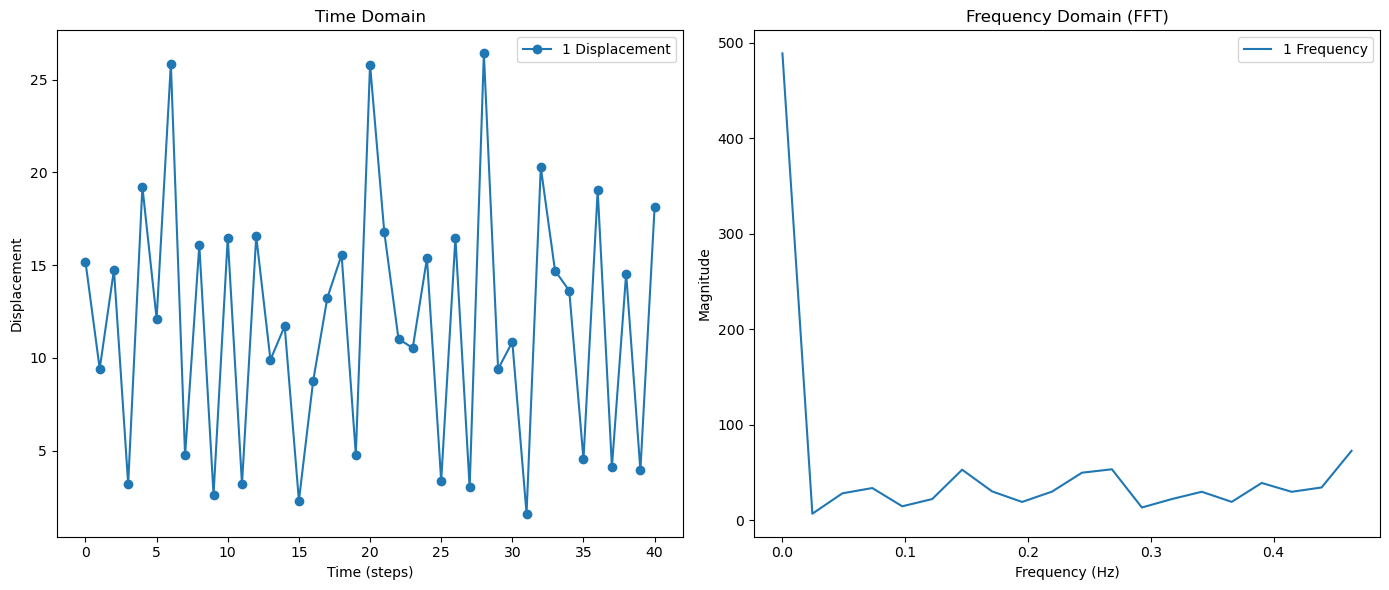

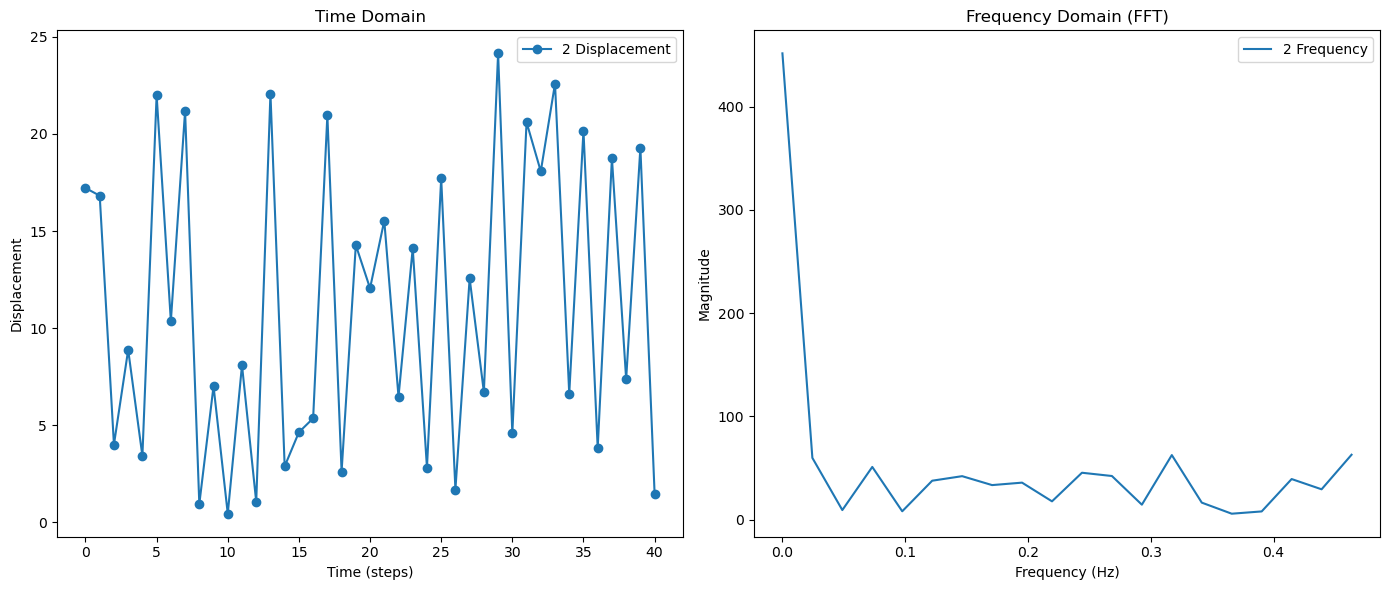

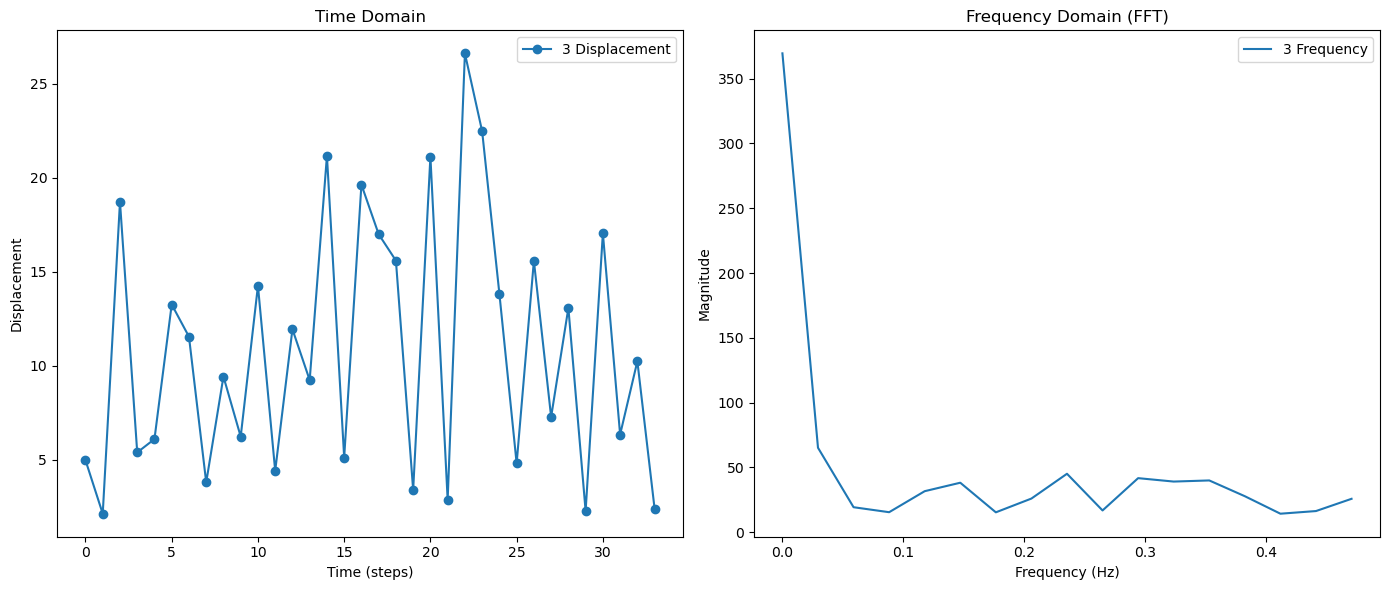

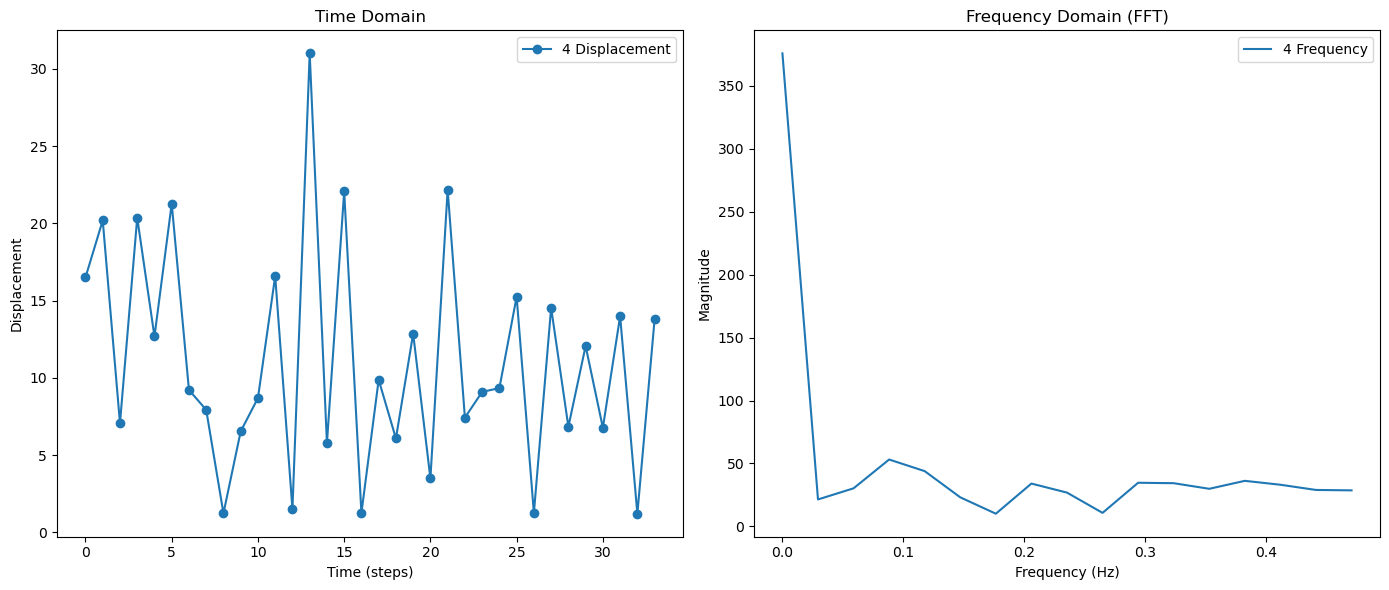

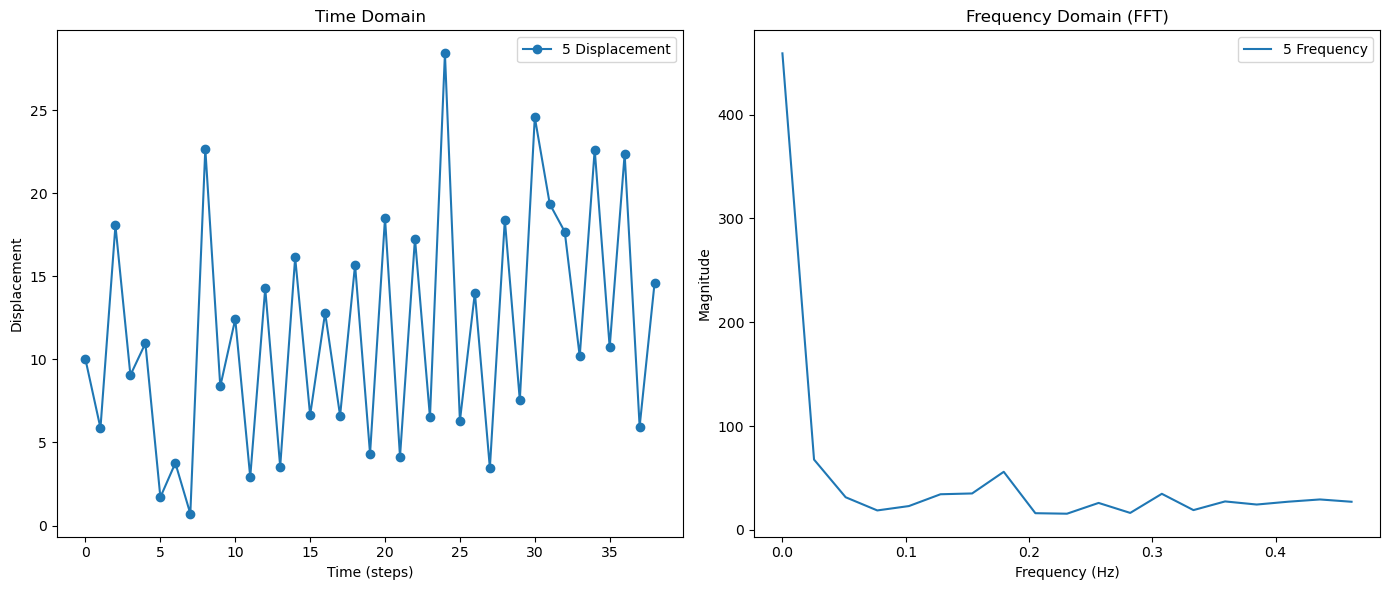

In [28]:
# calculate displacement and apply fft
# 這次使用與中心點的差距做 FFT

# 做出一個平均中心點的 list (長度為 len(movements) - 1)
def calculate_centroid(movements):
    centroids_list = []

    for i in range(len(movements)):
        sum_x = 0
        sum_y = 0
        # centroids.append(movements[i][0])  # Append the rally_id
        for j in range(2, len(movements[i])): # Skip the rally_id 
            sum_x += movements[i][j][0]
            sum_y += movements[i][j][1]
        avg_x = sum_x / (len(movements[i]) - 2)
        avg_y = sum_y / (len(movements[i]) - 2)

        centroids_list.append((avg_x, avg_y))

    return centroids_list

# 用平均中心點做出距離的 list
def calculate_displacement(movements, centroids_list):
    displacements_list = []

    for i in range(len(movements)):
        displacements = []
        # displacements.append(movements[i][0])  # Append the rally_id
        cen_x, cen_y = centroids_list[i]
        
        for j in range(2, len(movements[i])): # Skip the rally_id 
            x, y = movements[i][j]
            displacement = np.sqrt((x - cen_x) ** 2 + (y - cen_y) ** 2)
            displacements.append(displacement)

        displacements_list.append(displacements)

    return displacements_list

def perform_fft(signal, sampling_rate):
    N = len(signal)
    fft_result = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(N, d=1/sampling_rate)  # Frequency bins
    magnitude = np.abs(fft_result)[:N // 2]  # Positive frequencies only
    return fft_freq[:N // 2], magnitude

def plot_results(time_signal, frequency, magnitude, id):
    # Time-Domain Plot
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(time_signal, label=f"{id} Displacement", marker='o')
    plt.title("Time Domain")
    plt.xlabel("Time (steps)")
    plt.ylabel("Displacement")
    plt.legend()

    # Frequency-Domain Plot
    plt.subplot(1, 2, 2)
    plt.plot(frequency, magnitude, label=f"{id} Frequency")
    plt.title("Frequency Domain (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()

    plt.tight_layout()
    plt.show()

centroids_list = calculate_centroid(player_movements)
for i in range(5):
    print(f"Centroid of {i + 1}: {centroids_list[i]}")

print("centroids_list length: ", len(centroids_list))
print("player_movements length: ", len(player_movements))

displacement = calculate_displacement(player_movements, centroids_list)
for i in range(5):
    freaquency, magnitude = perform_fft(displacement[i], 1)
    plot_results(displacement[i], freaquency, magnitude, f"{i + 1}")

In [32]:
# 把 set 整合起來 變成一行一個 set

shot_rally = shots_with_set_id
# reordering columns
shot_rally = shot_rally[["set_id", "rally_id", "shot_id", "shot_number", "shot_player", "player_location_x", "player_location_y", "opponent_location_x", "opponent_location_y"]]
print("columns of data: ")
print(shot_rally.columns)
shot_sorted = shot_rally.sort_values(by=['set_id', 'rally_id', 'shot_id'])

shots_by_set = []
shots_by_rally = []
set_id = shot_sorted.iloc[0]["set_id"]
for i in range(len(shot_sorted)):
    if shot_sorted.iloc[i]["set_id"] == set_id:
        shots_by_rally.append(shot_sorted.iloc[i].tolist())
    else:
        shots_by_set.append(shots_by_rally)
        shots_by_rally = []
        set_id = shot_sorted.iloc[i]["set_id"]
        shots_by_rally.append(shot_sorted.iloc[i].tolist())

print("Number of sets: ", len(shots_by_set))
total_rallies = 0
for i in range(len(shots_by_set)):
    total_rallies += len(shots_by_set[i])
print("Number of rallies: ", total_rallies)
print("average number of rallies in each set: ", total_rallies / len(shots_by_set))
print("---------------------------------")

print("First 5 rallies:")
print("columns: set_id, rally_id, shot_id, shot_number, shot_player, player_location_x, player_location_y, opponent_location_x, opponent_location_y")
for i in range(5):
    print(shots_by_set[i])
print("---------------------------------")

columns of data: 
Index(['set_id', 'rally_id', 'shot_id', 'shot_number', 'shot_player',
       'player_location_x', 'player_location_y', 'opponent_location_x',
       'opponent_location_y'],
      dtype='object')
Number of sets:  538
Number of rallies:  193880
average number of rallies in each set:  360.3717472118959
---------------------------------
First 5 rallies:
columns: set_id, rally_id, shot_id, shot_number, shot_player, player_location_x, player_location_y, opponent_location_x, opponent_location_y
[[57.0, 1352.0, 11373.0, 1.0, 9.0, 31.71750712, 36.12710979, 25.11518563, 101.80983651], [57.0, 1352.0, 11374.0, 2.0, 5.0, 25.70237948, 92.38995924, 30.57374467, 31.08161091], [57.0, 1353.0, 11375.0, 1.0, 9.0, 28.5299257, 37.11889595, 42.06954921, 101.64335018], [57.0, 1353.0, 11376.0, 2.0, 5.0, 35.06717585, 92.73812362, 30.57545912, 31.70510295], [57.0, 1353.0, 11377.0, 3.0, 9.0, 22.62923218, 15.43894588, 28.91188256, 108.77908293], [57.0, 1353.0, 11378.0, 4.0, 5.0, 25.60856254, 114.

In [41]:
# 現在每行都有 player 和 opponent 的位置，我們需要把他們分開擷取出來
print("set columns: ")
print(shots_by_set[0])
# print(shots_by_set)

# 沒辦法驗證每行的 player 和 opponent 是交換的，因為 rally 之間的 player 是不會交換的
# def validate_alternating_players(set):
#     players = [shot[4] for shot in set]  # Assuming 'shot_player' is the 5th column
#     return all(players[i] != players[i + 1] for i in range(len(players) - 1))
               
# print("Number of sets before validating alternating players: ", len(shots_by_set))
# shots_by_set = [set for set in shots_by_set if validate_alternating_players(set)]
# print("Number of sets after validating alternating players: ", len(shots_by_set))


# 把 player 和 opponent 擷取出來
# columns: set_id, rally_id, shot_id, shot_number, shot_player, player_location_x, player_location_y, opponent_location_x, opponent_location_y
def extract_player_movements(shots_by_set):
    movements = []  # To store extracted movements
    for set in shots_by_set:
        set_id = set[0][0]  # Assuming 'rally_id' is the 1nd column
        first_player = set[0][4]  # Assuming 'shot_player' is the 5rd column
        second_player = set[1][4]
        set_a = [set_id, first_player] # first element is rally_id, second element is player name
        set_b = [set_id, second_player]
        for shot in set:
            # Extract shot details
            player = shot[4]  # Assuming 'shot_player' is the 3rd column
            player_x, player_y = shot[5], shot[6]  # Player location
            opponent_x, opponent_y = shot[7], shot[8]  # Opponent location

            # Create rows for player and opponent
            if player == first_player:
                set_a.append([player_x, player_y])  # Player A row
                set_b.append([opponent_x, opponent_y])
            else:
                set_b.append([player_x, player_y])  # Player B row
                set_a.append([opponent_x, opponent_y])
        movements.append(set_a)
        movements.append(set_b)
    return movements

# Extract movements from the sets
print("Extracting player movements...")
player_movements_with_set = extract_player_movements(shots_by_set)

# Print the first 5 player movements
print("First 5 extracted player movements:")
for i in range(5):
    print(player_movements_with_set[i])
print("done")

set columns: 
[[57.0, 1352.0, 11373.0, 1.0, 9.0, 31.71750712, 36.12710979, 25.11518563, 101.80983651], [57.0, 1352.0, 11374.0, 2.0, 5.0, 25.70237948, 92.38995924, 30.57374467, 31.08161091], [57.0, 1353.0, 11375.0, 1.0, 9.0, 28.5299257, 37.11889595, 42.06954921, 101.64335018], [57.0, 1353.0, 11376.0, 2.0, 5.0, 35.06717585, 92.73812362, 30.57545912, 31.70510295], [57.0, 1353.0, 11377.0, 3.0, 9.0, 22.62923218, 15.43894588, 28.91188256, 108.77908293], [57.0, 1353.0, 11378.0, 4.0, 5.0, 25.60856254, 114.10857765, 25.28814858, 18.26590508], [57.0, 1353.0, 11379.0, 5.0, 9.0, 22.65681568, 37.16802549, 26.40339842, 109.75695634], [57.0, 1353.0, 11380.0, 6.0, 5.0, 31.14858633, 104.98987966, 27.2235107, 32.67250494], [57.0, 1354.0, 11381.0, 1.0, 9.0, 31.60920864, 35.16842879, 24.36557417, 102.73752634], [57.0, 1354.0, 11382.0, 2.0, 5.0, 22.45380931, 92.85943608, 27.82295287, 34.56321409], [57.0, 1354.0, 11383.0, 3.0, 9.0, 17.56660288, 47.18051928, 25.74769784, 99.97564043], [57.0, 1354.0, 11384.0,

Centroid of 1: (28.845456073745385, 24.50810758166051)
Centroid of 2: (29.268964120885606, 106.77757731830256)
Centroid of 3: (32.23892724536399, 107.96497201176243)
Centroid of 4: (32.376963559118806, 27.881692027452136)
Centroid of 5: (30.980122924913836, 65.06942079331041)
centroids_list length:  1076
player_movements length:  1076


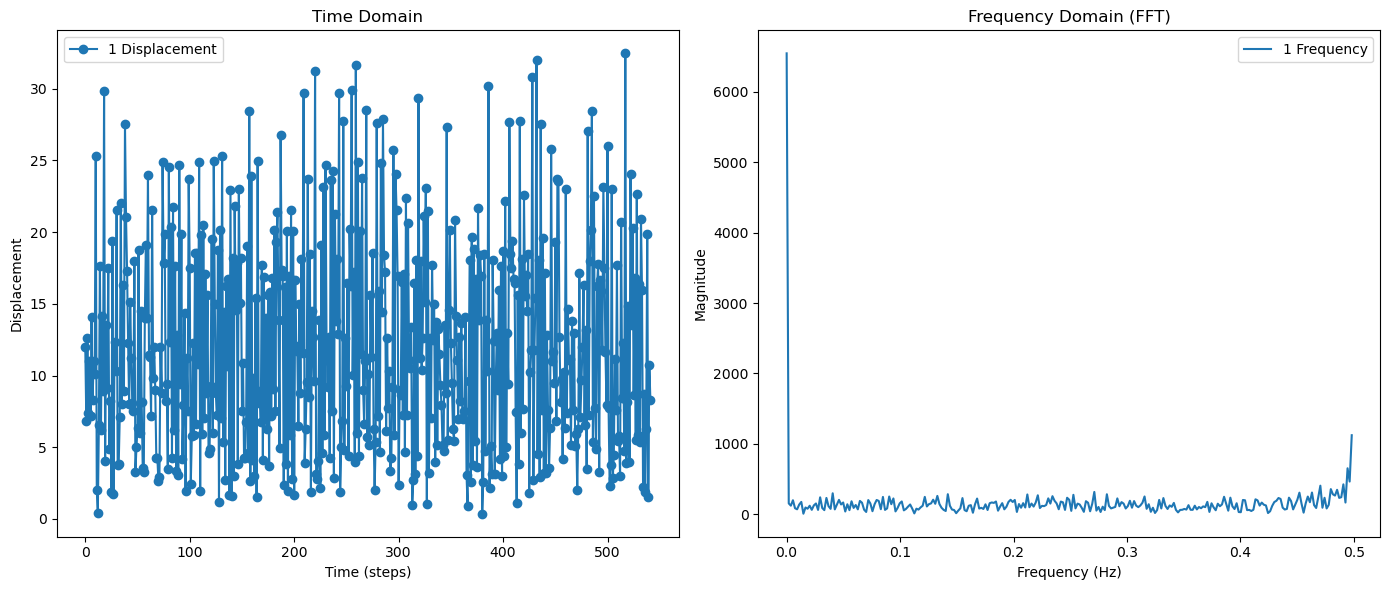

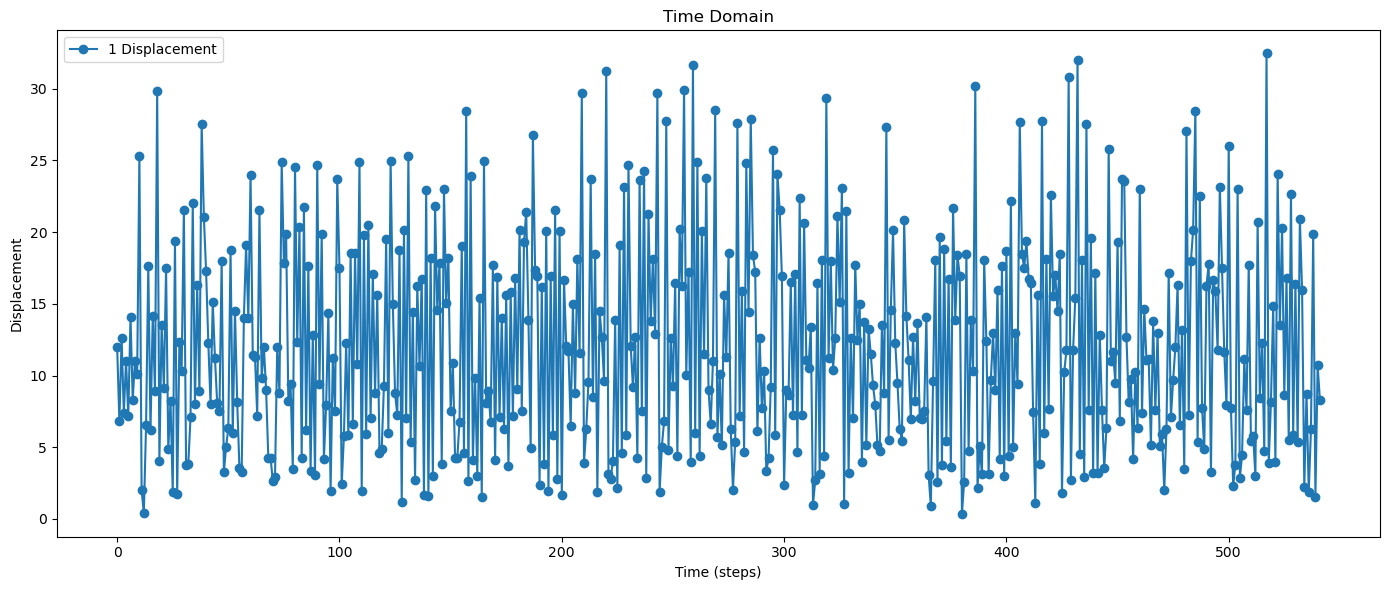

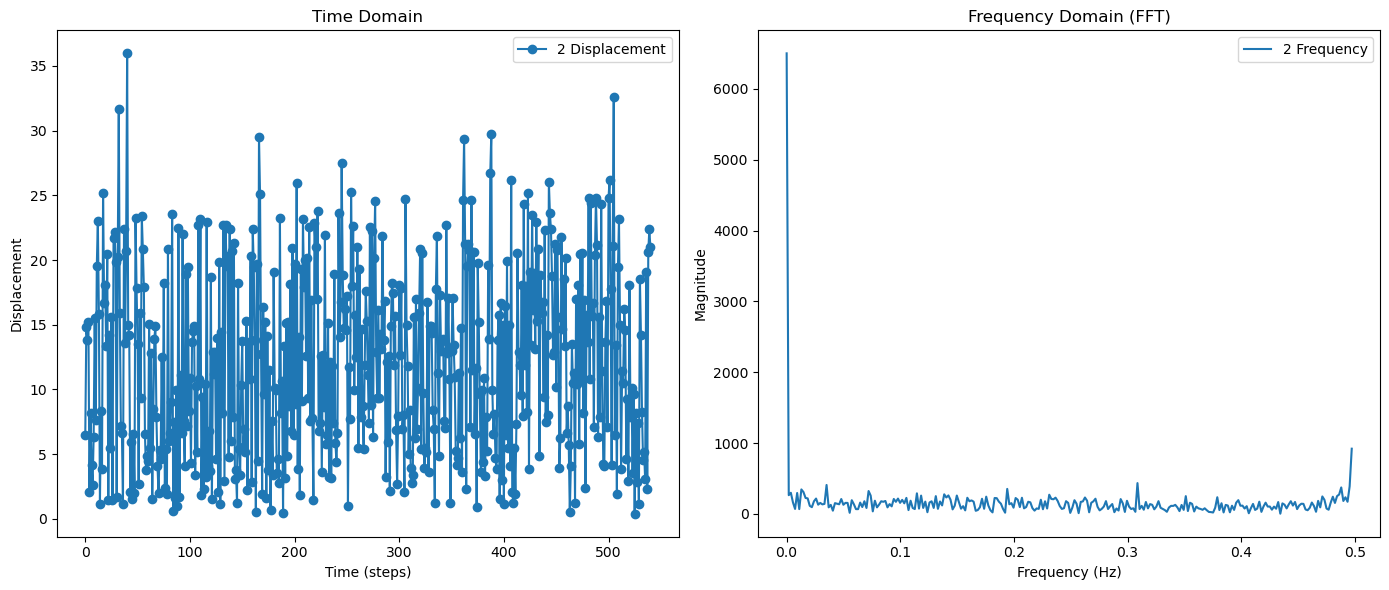

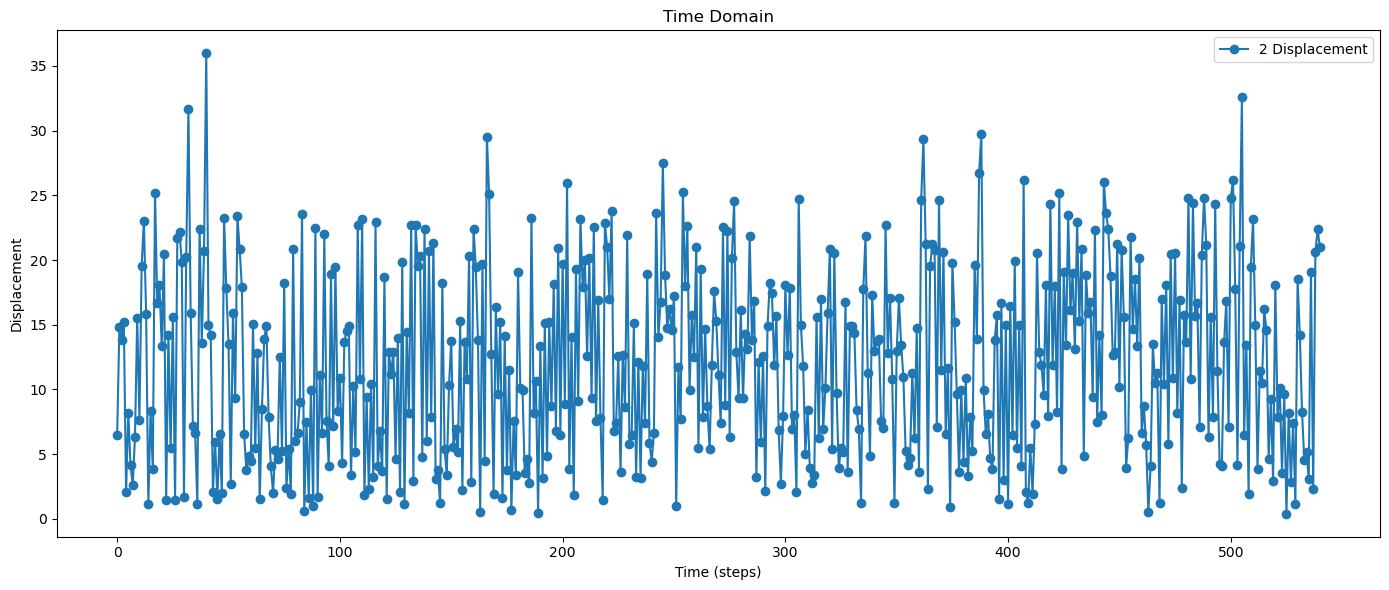

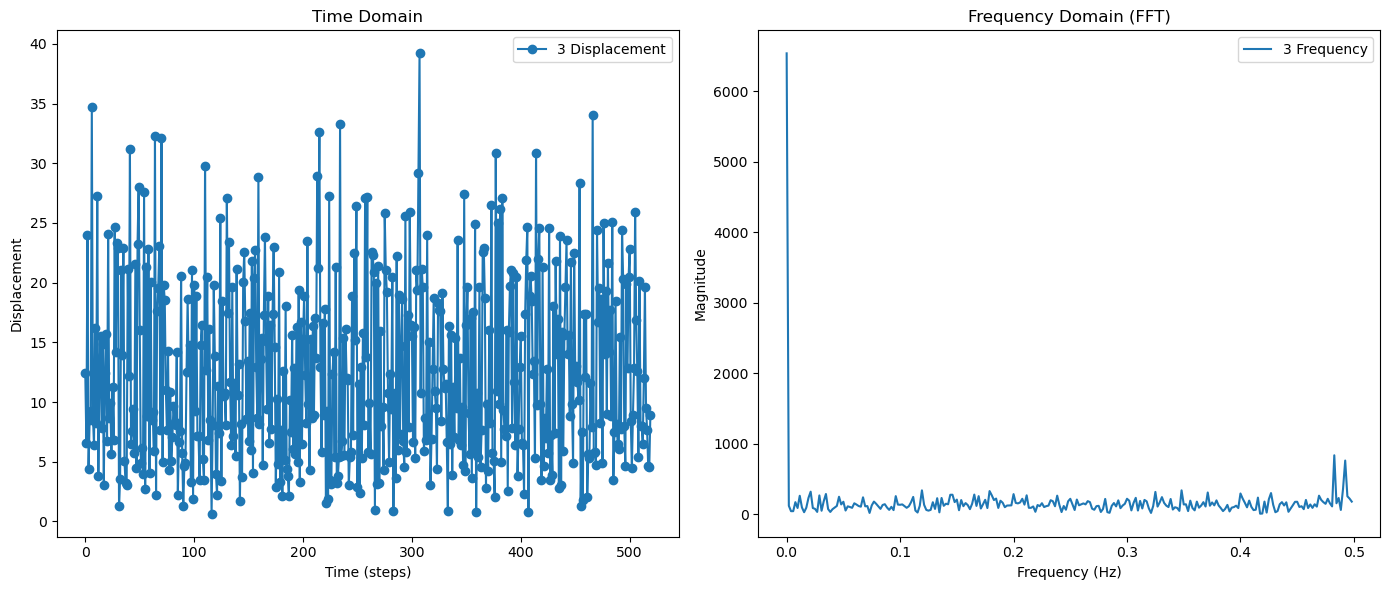

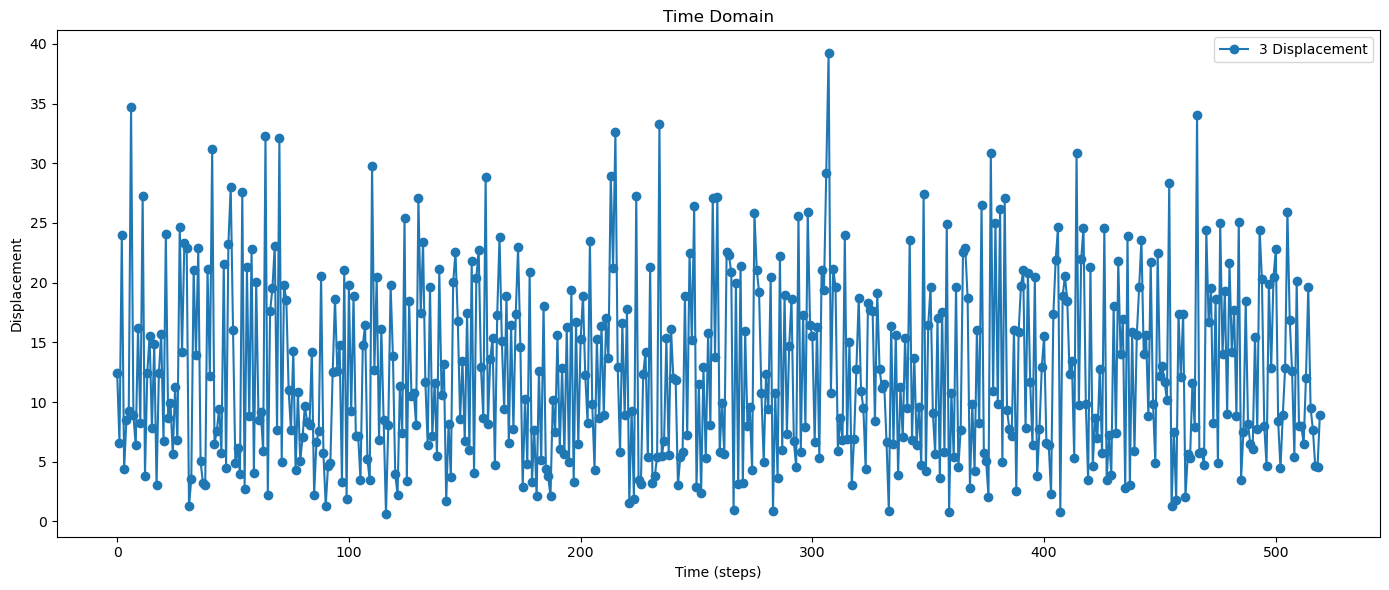

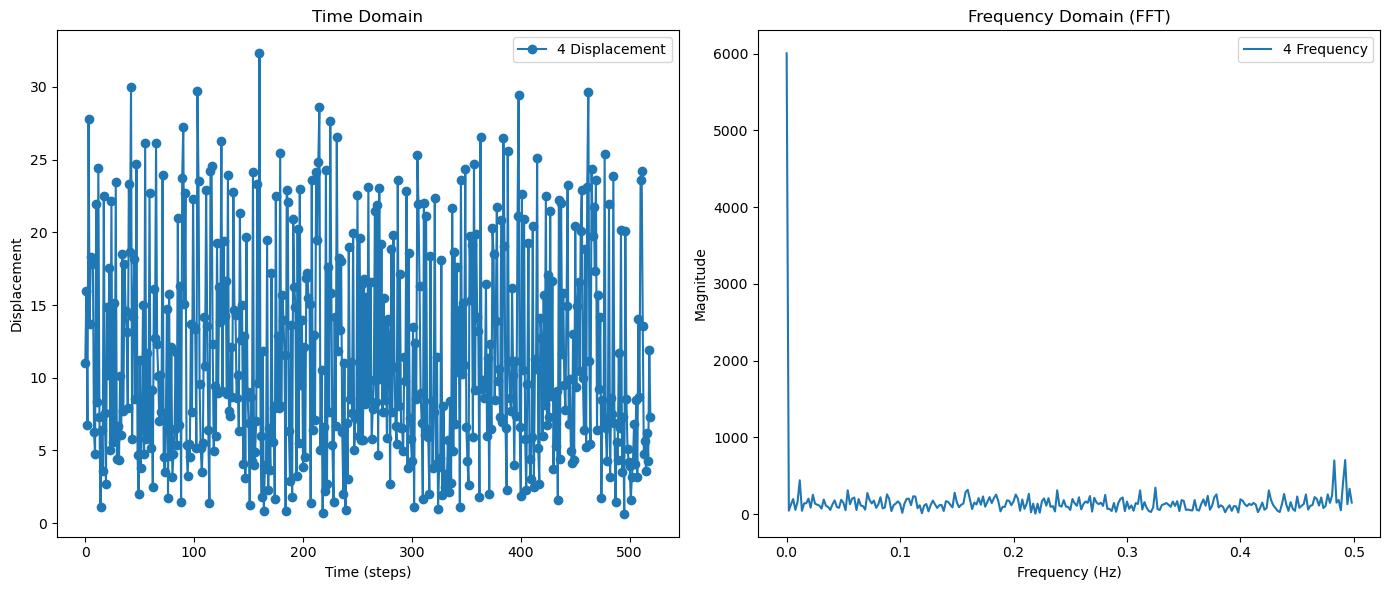

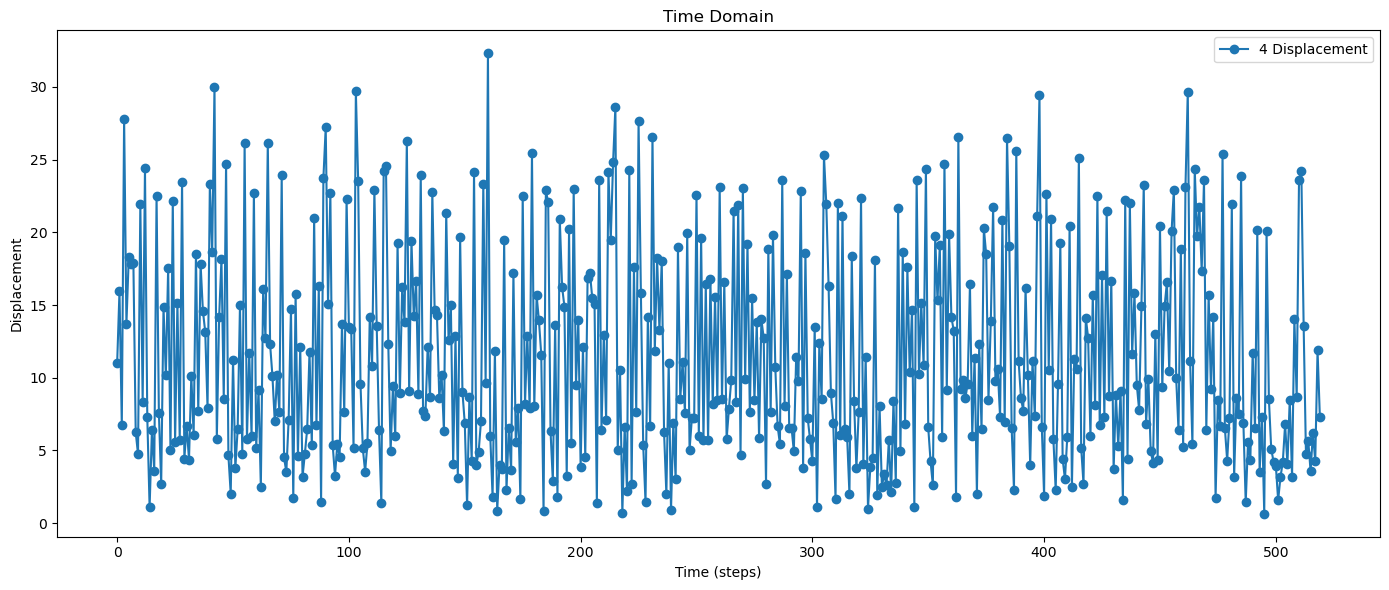

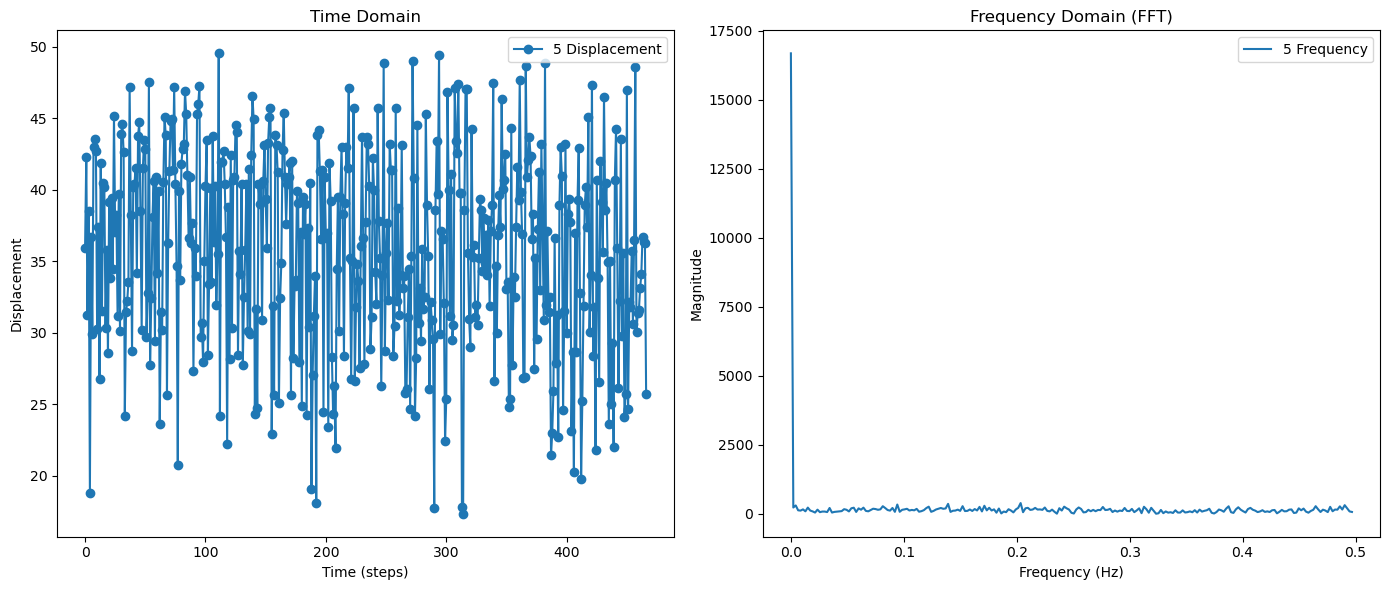

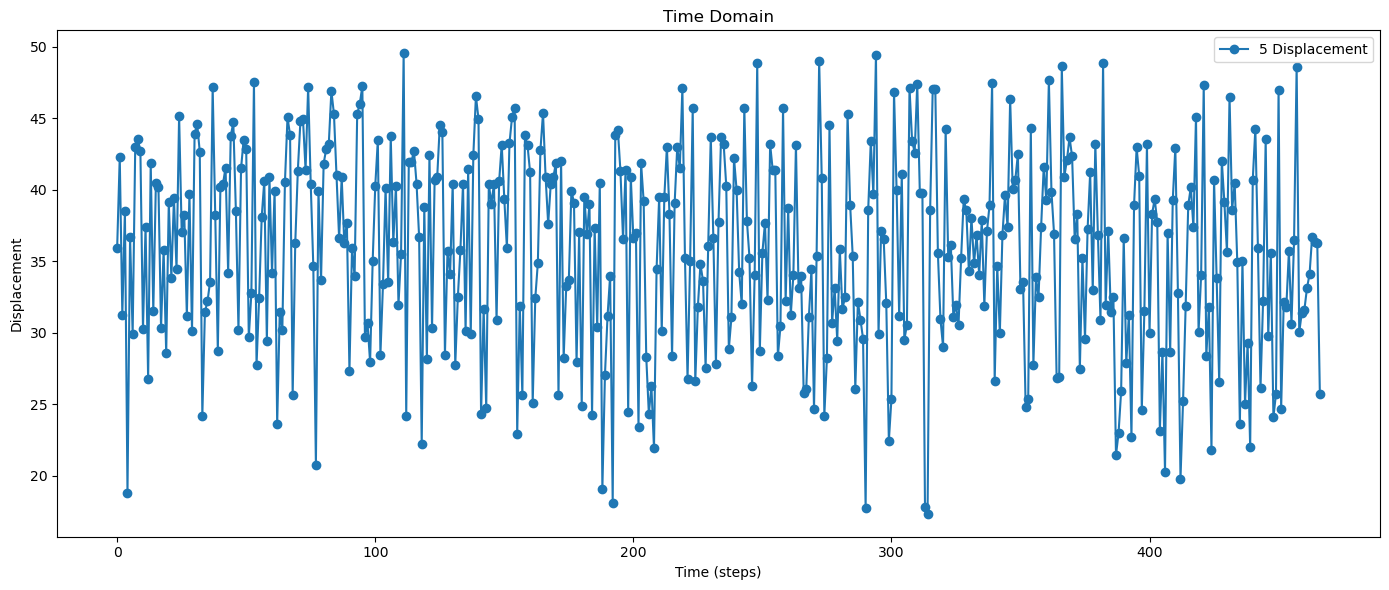

In [43]:
# calculate displacement and apply fft
# 使用與中心點的差距做 FFT

# 做出一個平均中心點的 list (長度為 len(movements) - 1)
def calculate_centroid(movements):
    centroids_list = []

    for i in range(len(movements)):
        sum_x = 0
        sum_y = 0
        # centroids.append(movements[i][0])  # Append the rally_id
        for j in range(2, len(movements[i])): # Skip the rally_id 
            sum_x += movements[i][j][0]
            sum_y += movements[i][j][1]
        avg_x = sum_x / (len(movements[i]) - 2)
        avg_y = sum_y / (len(movements[i]) - 2)

        centroids_list.append((avg_x, avg_y))

    return centroids_list

# 用平均中心點做出距離的 list
def calculate_displacement(movements, centroids_list):
    displacements_list = []

    for i in range(len(movements)):
        displacements = []
        # displacements.append(movements[i][0])  # Append the rally_id
        cen_x, cen_y = centroids_list[i]
        
        for j in range(2, len(movements[i])): # Skip the rally_id 
            x, y = movements[i][j]
            displacement = np.sqrt((x - cen_x) ** 2 + (y - cen_y) ** 2)
            if displacement > 50:
                # remove the outlier
                continue
            displacements.append(displacement)

        displacements_list.append(displacements)

    return displacements_list

def perform_fft(signal, sampling_rate):
    N = len(signal)
    fft_result = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(N, d=1/sampling_rate)  # Frequency bins
    magnitude = np.abs(fft_result)[:N // 2]  # Positive frequencies only
    return fft_freq[:N // 2], magnitude

def plot_results(time_signal, frequency, magnitude, id):
    # Time-Domain Plot
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(time_signal, label=f"{id} Displacement", marker='o')
    plt.title("Time Domain")
    plt.xlabel("Time (steps)")
    plt.ylabel("Displacement")
    plt.legend()

    # Frequency-Domain Plot
    plt.subplot(1, 2, 2)
    plt.plot(frequency, magnitude, label=f"{id} Frequency")
    plt.title("Frequency Domain (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_results_only_time(time_signal, frequency, magnitude, id):
    # Time-Domain Plot
    plt.figure(figsize=(14, 6))
    plt.plot(time_signal, label=f"{id} Displacement", marker='o')
    plt.title("Time Domain")
    plt.xlabel("Time (steps)")
    plt.ylabel("Displacement")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

centroids_list = calculate_centroid(player_movements_with_set)
for i in range(5):
    print(f"Centroid of {i + 1}: {centroids_list[i]}")

print("centroids_list length: ", len(centroids_list))
print("player_movements length: ", len(player_movements_with_set))

displacement = calculate_displacement(player_movements_with_set, centroids_list)
for i in range(5):
    freaquency, magnitude = perform_fft(displacement[i], 1)
    plot_results(displacement[i], freaquency, magnitude, f"{i + 1}")
    plot_results_only_time(displacement[i], freaquency, magnitude, f"{i + 1}")
